<h1 style='text-align: center'> COMSATS University, Islamabad </h1>
<h1 style='text-align: center'> Department of Computer Science </h1>
<h1 style='text-align: center'> CSC483 - Topics in Computer Science II (Programming for Artificial Intelligence) </h1>
<h2 style='text-align: center'> Assignment 02 </h2>
<h2 style='text-align: center'> Submitted by: Waleed Butt SP18-BCS-170 </h2>

### Question CLO-3
* Visit [MadhumithaKannan - linear-regression-using-only-numpy](https://github.com/MadhumithaKannan/linear-regression-using-only-numpy) and familiarize yourself with the data available in lin_reg_data.csv and the code of different regression schemes.  
* Randomly divide 50% data as your training set and the remaining 50% as your test set.  
* Using training set, your goal is to find the parameters of line using linear regression, ridge regression and lasso regression respectively. Plot all three lines overlaid with original training and test data in a single figure and use legends to label the three lines in the figure. Show training and test sets in two different colors in that figure.  
* In order to see how the three lines fit the training and test set, calculate the sum of square residuals of the three lines with the training and test set respectively and display the 6 values in a tabulated form.

### Submission Procedure:  
* Please submit the binder or colab link to your respective CRs

### Submission  

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/waleedbutt98/A2_CS2AI.git/HEAD)

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/waleedbutt98/A2_CS2AI/blob/master/A2.ipynb)

### Solution

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading Data

In [2]:
df = pd.read_csv('lin_reg_data.csv', header=None)
df

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [3]:
x = np.array(df.iloc[:, 0])
y = np.array(df.iloc[:, 1])
print(len(x), len(y))

100 100


### Divding Data into Train and Test

In [4]:
x_train = x[:int(len(x)/2)]
y_train = y[:int(len(y)/2)]
x_test = x[int(len(x)/2):]
y_test = y[int(len(y)/2):]

### Simple Linear Regression

In [5]:
# number of observations/points
n = np.size(x_train)

# mean of x and y vector
m_x = np.mean(x_train)
m_y = np.mean(y_train)

# calculating cross-deviation and deviation about x
SS_xy = np.sum(y_train*x_train) - n*m_y*m_x
SS_xx = np.sum(x_train*x_train) - n*m_x*m_x

# calculating regression coefficients
b_1_simple = SS_xy / SS_xx
b_0_simple = m_y - b_1_simple*m_x

print('Estimated coefficients: b_0 = {}, b_1 = {}'.format(b_0_simple, b_1_simple))

Estimated coefficients: b_0 = -4.120124382827271, b_1 = 1.5261138283971487


### Ridge Regression

In [6]:
learning_rate = 0.005 #learning rate
l2_penality = 0.001 #regularization parameter

# no_of_training_examples, no_of_features
n_ridge = len(x_train)

# weight initialization        
W_ridge = np.zeros( n_ridge )

b_ridge = 0

for i in range(100):
    
    y_pred_ridge = x_train * (W_ridge) + b_ridge
    
    dW = (-2/n_ridge)*(x_train*(y_train-y_pred_ridge))+2*l2_penality*W_ridge      
        
    db = (-2/n_ridge)*(y_train-y_pred_ridge)

    # update weights
    W_ridge = W_ridge - (learning_rate * dW)    
    b_ridge = b_ridge - (learning_rate * db)

### Lasso Regression

In [7]:
learning_rate = 0.01
l2_penality = 500

# no_of_training_examples, no_of_features        
m_lasso = 1
n_lasso = len(x_train)

# weight initialization        
W_lasso = np.zeros( n_lasso )

b_lasso = 0

for i in range(1000):
    
    y_pred_lasso=np.zeros((y_train.shape))
    
    for j in range(len(x_train)):
        
        y_pred_lasso[j] = x_train[j] * ( W_lasso[j] ) + b_lasso
    
        # calculate gradients
        if W_lasso[j] > 0:
            dW = (-2/n_lasso)*(x_train[j]*(y_train[j]-y_pred_lasso[j]))-learning_rate      
        else:
            dW = (-2/n_lasso)*(x_train[j]*(y_train[j]-y_pred_lasso[j]))+learning_rate
        
        db = (-2/n_lasso)*(x_train[j]*(y_train[j]-y_pred_lasso[j]))+learning_rate
          
        # update weights
        W_lasso = W_lasso - (learning_rate * dW)    
        b_lasso = b_lasso - (learning_rate * db)

### Plotting

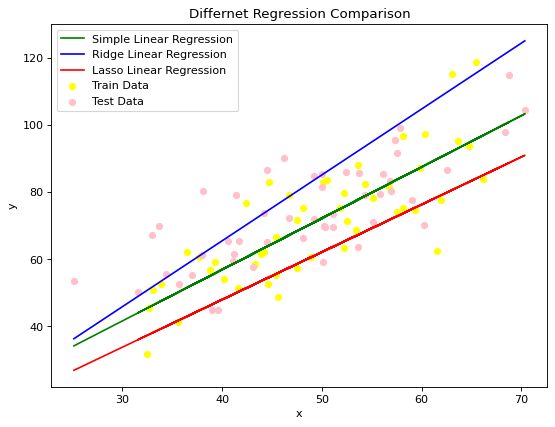

In [8]:
plt.figure(figsize=(8, 6), dpi=80)

# plotting the actual points as scatter plot
plt.scatter(x_train, y_train, color = "yellow", marker = "o", s = 30, label="Train Data")
plt.scatter(x_test, y_test, color = "pink", marker = "o", s = 30, label="Test Data")

# predicted response vector for Linear Regression
y_pred_simple = b_0_simple + b_1_simple*x_test
# plotting the Linear regression line
plt.plot(x_test, y_pred_simple, color = "g", label='Simple Linear Regression')

# predicted response vector for Ridge Regression
y_pred_ridge = x_test * (W_ridge) + b_ridge
# Plotting the Ridge regression line
plt.plot([min(x_test), max(x_test)], [min(y_pred_ridge), max(y_pred_ridge)], color = "b", label='Ridge Linear Regression')

# predicted response vector for Lasso Regression
y_pred_lasso = x_test * (W_lasso) + b_lasso
# Plotting the Lasso regression line
plt.plot(x_test, y_pred_lasso, color = "r", label='Lasso Linear Regression')

# putting labels
plt.title('Differnet Regression Comparison')
plt.xlabel('x')
plt.ylabel('y')

# function to show plot
plt.legend()
plt.show()